For my project I analysed the noshowappointments-kagglev2-may-2016 dataset

The questions posed during the data investigation include;
1. Does gender influence the rate of attendance?
2. Does age determine probability of attendance?
3. Do those people who receive SMS attend regularly?
4. Does any medical condition accelerate probability of attendance?

In [4]:
import pandas as pd

In [38]:
df=pd.read_csv(r'D:\Data analyst ALX\noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# read and import the csv file so as to see , modify and use the dataset



In [5]:
df.shape

(110527, 14)

# checking the dataset in terms of number of columns and rows

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# checking for any missing values and datatypes apparently there are none

In [24]:
df.duplicated().sum() , df.duplicated('PatientId').sum(), df.duplicated('AppointmentID').sum()


(0, 48228, 0)

#Checking if the data has duplicates using the appointmentID and PatientId because they contain unique values

In [40]:
df.Gender = df.Gender.astype('category')
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

# The Gender datatype can be changed into category because it has options such Male or Female, also the AppointmentDay and schedule day


In [37]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  category           
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  object             
dtypes: category(1), datetime64[ns, UTC](2), int64(7), object(2)
memory usage

#check whether the changes have been effected.

In [32]:
df.columns.str.lower()

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no-show'],
      dtype='object')

# Change the column titles to be in lowercas so as to be clearly visible

In [41]:
df.drop(['PatientId','AppointmentID'],axis=1, inplace=True)

# We need to drop these two coulumns because they seem not to be valuable when doing analysis

In [42]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [47]:
df.rename(columns={'No-show': 'Present'}, inplace=True)

#Renaming the column noshow to Present because it is either yes or no.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  category           
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  Present         110527 non-null  object             
dtypes: category(1), datetime64[ns, UTC](2), int64(7), object(2)
memory usage

In [49]:
df.Present.replace(['No', 'Yes'], [1, 0], inplace=True)

In [50]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


#Checking the dataset description overview age has a negative value which needs to be investigated and removed

In [52]:
df[df.Age < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


# checking the record that contains the negtive value

Outlier Threshold: 110


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present
63912,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0
63915,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0
68127,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0
76284,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1
97666,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,1


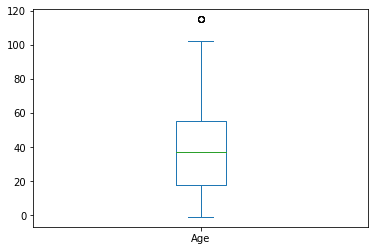

In [55]:
df.Age.plot(kind='box');
iqr = df.Age.quantile(0.75) - df.Age.quantile(0.25)
outlier = df.Age.quantile(0.75) + 1.5*iqr
print('Outlier Threshold:', int(round(outlier,0)))
df[df.Age > 110]

# We can use a boxplot to check for outliers in terms of negative values and  exegerated values in a visualized manner

In [56]:
df = df[(df.Age >=0) & (df.Age <=110)]
df.shape

(110521, 12)

In [57]:
(df.groupby('Gender').size() / df.shape[0]).round(2)

Gender
F    0.65
M    0.35
dtype: float64

# there are almost 2 times more female patients than male

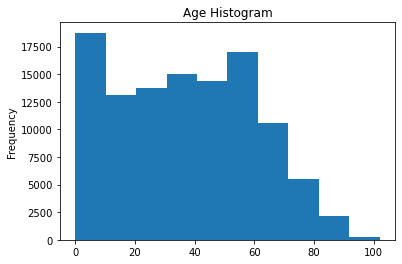

In [59]:
import matplotlib.pyplot as plt
df.Age.plot(kind='hist',bins=10)
plt.title('Age Histogram');

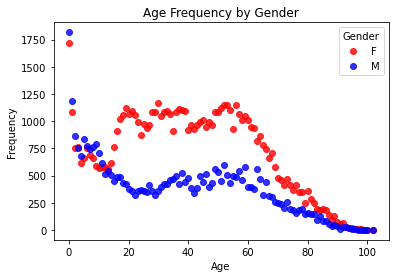

In [60]:
pd.crosstab(df.Age, df.Gender).plot(style=['or','ob'], alpha=0.8);
plt.title('Age Frequency by Gender')
plt.ylabel('Frequency');

In [65]:
%matplotlib inline
def proportion_attendance(feature):
    pd.crosstab(df[feature], df.Present, normalize='columns').plot(kind='bar', alpha=0.85)
    plt.xlabel('Feature: {}'.format(feature.replace('_',' ').title()))
    plt.ylabel('Proportion')
    plt.title('Proportion of Attendance Rate by {}'.format(feature.replace('_',' ').title()))
    plt.margins(y=0.1)
    return plt

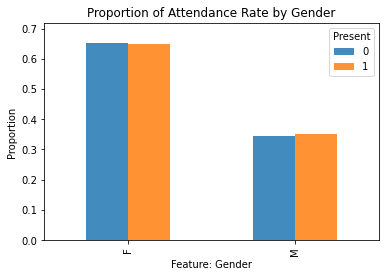

In [66]:
proportion_attendance('Gender');

#Question 1.	Does gender  influence the rate of attendance
#From the below visualization there is no evidence of correlation between gender and attendance

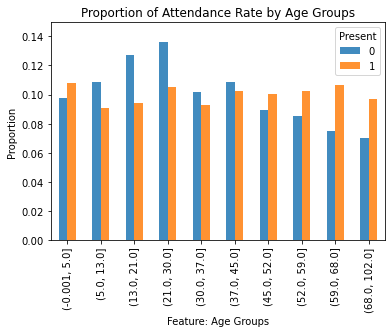

In [69]:
df['age_groups'] = pd.qcut(df.Age, 10)
proportion_attendance('age_groups');

# Question 2 2.	Does age determine probability of attendance

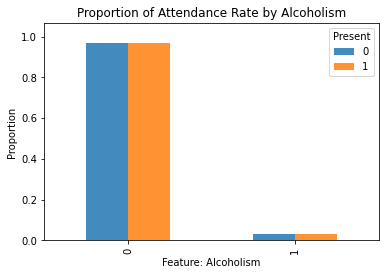

In [70]:
ref_list = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

proportion_attendance('Alcoholism');

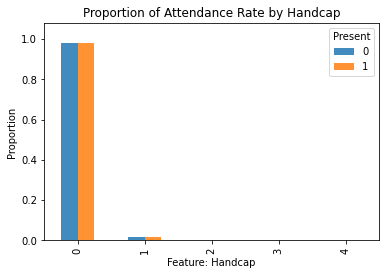

In [71]:
ref_list = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

proportion_attendance('Handcap');

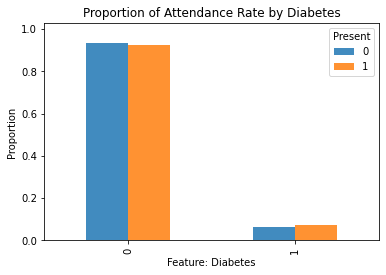

In [72]:
ref_list = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

proportion_attendance('Diabetes');

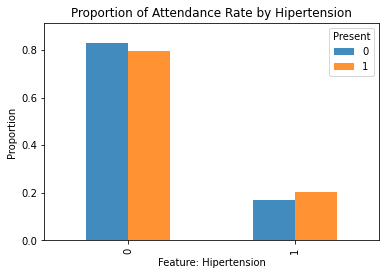

In [73]:
ref_list = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

proportion_attendance('Hipertension');

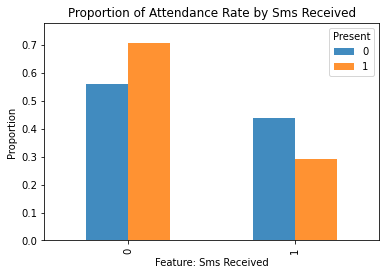

In [74]:
proportion_attendance('SMS_received');

                        Conclusions 
After analyzing the data and answering the investigation questions we can conclude 
that some features impact the probability of patient’s attendance. Some features 
showed a high attendance rate compared to others. This descriptive statistical 
analysis allows us to identify features with possible correlation to the dependent 
variable - which would be interesting to further investigate using hypothesis 
testing and/or regression models.
Here is a summary of the initial findings:
• Gender does not seem to have any impact with the attendance rate;

• Age groupsless than 5 years and over 45 years old: seems to be more likely to show up
between 5 and 45 years old: seems to be less likely to show up

• Medical Conditions: patients suffering from alcoholism and diabetes seems to 
be slightly more likely to attend

• SMS reminder: even though there is evidence receiving an SMS reminder seems 
to make the patients less likely to show up, we should ignore this variable due to 
lack of explain ability.


                            Limitations
The dataset contains negative values for the feature age  and values that are also too high which 
are outliers that may make it difficult using these values during data analysis.